<a href="https://colab.research.google.com/github/IntroComputationalPhysics-UNT/kapitza-pendulum-Skates-b/blob/main/kapitza_pendulum_finalassignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overview & Pseudocode
---

Overall objectives for this assignment:

1. Design our own stability diagnostic for this pendulum.
2. Map the long-time behavior vs the parameters.
3. Produce a 2D stability plot.

---
Pseudocode:
1. **Install the necessary libraries:** CHECK
2. **Define our dimensionless quantities and parameters:**
3. **Define our equation of motion and other functions:**
4. **Design a stability diagnostic:**
5. **Map the long time behavior vs parameters:**
6. **Graph a 2D stability plot:**

## ***To Do List:***

**Github requirements:**
1. Justify our stability diagnostic:

    a. Choose initial conditions to represent the inverted state (*what is inverted state?*)

    b. Determine how to quantify long time behavior, decide how long to integrate, etc.

    c. JUSTIFY!!! STABILITY DIAGNOSTIC!!!

2. Make a sweep function for epsilon next to alpha for one fixed zeta

    a. for each point, determine stability indicator of these functions according the the stability diagnostic

3. PLOT

    a. Make a plot with ϵ on the x-axis and α on the y-axis, where color (or contours) shows your long-time response measure.

    b. From this data, extract an approximate stability boundary α_c(ϵ) separating stable and unstable behavior.

    c. Propose a simple functional form for this boundary (for example, α_c(ϵ)≈C ϵ^2).

    d. Superimpose your guessed curve on top of the 2D plot and comment briefly on how well it matches your numerical results.

---
**Personal Coding Notices:**

1. Determine the actual parameter values (placeholders currently =1)

    Specifically: Gamma, y_p (which I thought is vertical position but double check), and... w_d because I think I can change it? w_d is the applied frequency(?*) and w_0 is the natural frequency (which, do I decide that??? am I God in this coding space?)

    Length "l" can remain = to 1.

2. ✅ define the epsilon_critical function (also, double check alpha_critical function)
3. fix whatever is going on with the kapitza function??? something seems off.
4. Figure out how to make a map and literally everything about plotting I would say
5. Reorganize the information and the coding so that you only have to click a few buttons to run things



**OK, STOP!**

Let's do some visualization of what is happening!

Video ref.: https://youtu.be/cjGqxF79ITI

We will have two stability points with this kapitza pendulum, one when it is vertically and one when it is vertically up when a certain frequency is applied to it. SO... that's what we are figuring out via dimensionless quantities. Which is why we're using pi and stuff like that... Unless you think about it like a pi chart, then it would be pi/2 and 3 pi/2... Maybe I can work with that since it's easier to visualize?

## Step 1 and 2


### **Install the nescessary libraries:**

We would like to import `numpy as np` for basic arthimatic, `matplotlib.pyplot as plt` for plotting, and `solve_ivp` from `scipy.integrate` for solving our ODE for the equation of motion.

In [7]:
# associated code; installing libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

### **Define our dimensionless quantities and parameters:**

Dimensionless quantities:

The angular frequency is represented by `w_d` which is equal to 1.
The natural frequency is represented by `w_0` equal to 1.
The _____ is represented by `gamma` equal to 1.
The vertical position of the pivot point is represented by `y_p` equal to 1.
The length of the pendulum is represented by `l` equal to 1.

---

There are several parameters that are used, and we can narrow some down into these three.*

The dimensionless damping is represented by `zeta` or `z` which is equal to `gamma / w_d`.
The dimensionless angular frequency is represented by `epsilon` or `ep` which is equal to `w_0/w_d`.
The fractional displacement of the pivot point is represented by `alpha` or `a` which is equal to `y_p/l`.

Finally, our new parameter in terms of redefining time is `tau` or `T` which is equal to `w_d t`

---

We would like to find the relationship between these three parameters.
`f(ep,a,z) > 1` due to the condition that `e^2 > a` can be expressed as `(w_0^2 * l / y_0 * w_d^2) = ep^2 / a` is greater than 1.

In [12]:
# associated code;
w_d = 1
w_0 = 1
gamma = 1
y_p = 1
l = 1
# the three parameters
zeta = z = gamma/w_d
epsilon = ep = w_0/w_d
alpha = a = y_p/l
# dimensionless time conversion
t = 0 # time??? CHECK CHECK CHECK
tau = T = w_d * t

# relationship condition between the three parameters
f = (ep**2 / a) # CHECK CHECK CHECK CHECK LATER***
print(f)

# OTHER
theta = 0 # CHECK CHECK CHECK CHECK

1.0


## Step 3 and 4

### **Define our equation of motion and other functions:**
We will define a function for the equation of motion for the kapitza pendulum called `kapitza_pen` with parameters: $$\tau, y, \epsilon, \alpha, \zeta$$ using the dimensionlesss equation of motion:
$$\theta" + 2 \zeta \theta ' + (\epsilon ^2 - \alpha cos(\tau)) sin(\theta) = 0$$
or
$$\theta'' = -2 \zeta \theta' - (\epsilon^2 - \alpha cos(\tau))sin(\theta)$$

---

We'll also define a function to find the boundaries of the inverted space: holding `ζ` and `ϵ` cosntant while sweeping `α`. We'll call this function `alpha_critical` since we're trying to find those boundaries.

In [4]:
### FUNCTIONS
# Equation of Motion ODE
def kapitza_pendulum(tau, y, epsilon, alpha, zeta):
	"""
	This function defines the equtation of motion for a Kapitza pendulum
	PARAMETERS:
	tau : float, ndarray
		dimensionless time : tau = omega_d * t
	y : ndarray
		state variables [theta, ang_vel]
	alpha : float
		relative displacement of the pivot to the pendulum arm : alpha  = y_0/l
	epsilon : float
		dimensionless frequency : epsilon = omega_0/omega_d
	zeta : float
		dimensionless damping coefficient : zeta = gamma/omega_d

	RETURNS:
	dy/dtau : ndarray
		time derivitives of state variables
	"""
	theta, ang_vel = y # unpack state variables
	dtheta_dtau = ang_vel #define the angular velocity
	d2theta_dtau2 = -2 * zeta * dtheta_dtau - (epsilon**2 - alpha * np.cos(tau)) * np.sin(theta)
	dy_dtau = np.array([dtheta_dtau, d2theta_dtau2]) # pack variables
	return dy_dtau

# LINE BREAK LINE BREAK LINE BREAK LINE BREAK LINE BREAK LINE BREAK LINE BREAK LINE BREAK LINE BREAK
# finding the boundaries of the inverted space
# our guess for the boundary of the inverted state. Parameters are `epsilon`, `zeta`, `coef`; returns `alpha`
def alpha_critical(epsilon, zeta, coef, alpha):
	"""
	This function defines the boundary of the inverted state
	PARAMETERS
	epsilon : float
		dimensionless frequency : epsilon = omega_0/omega_d
	zeta : float
		dimensionless damping coefficient
	coef : float
		tuning parameter to help with fit
	RETURNS:
	alpha : float
		relative displacement of the pivot to th ependulum arm : alpha = y_0/l
	"""
	alpha = coef*epsilon**2 # our (unjustified) guess at the moment; omits zeta --> needs updating
	return alpha

# NEW FUNCTION JUST DROPPED!!!
# this is our epsilon sweep function
def epsilon_critical(alpha, zeta, coef, epsilon):
	"""
	This function defines the boundary of the inverted state (epsilon)
	PARAMETERS
	alpha : float
		relative displacement of the pivot to the ependulum arm : alpha = y_0/l
	zeta : float
		dimensionless damping coefficient
	coef : float
		tuning parameter to help with fit
	RETURNS:
	epsilon : float
		dimensionless frequency : epsilon = omega_0/omega_d
	"""
	epsilon = coef * alpha**2 # unjustified guess based on alpha critical; zeta held constant
	return epsilon

print("Test Run Successful!!")


Test Run Successful!!


### **Design a stability diagnostic:**

This will be our stability diagnostic.
$$\theta = \frac{1}{T} \int \theta(t)dt$$

It will be stable if:
$$|\theta - \pi|<\delta$$

---

*Why this particular stability diagnostic? What does it mean and how does it work?*


In [18]:
# associated code; defining stability diagnostic
def stability_diagnostic(theta, delta):
  """
  This function defines the stability diagnostic for the Kapitza pendulum
  PARAMETERS
  theta : float
    This is the integral of something something...
  delta : float
    How stable it is??? The closer to... pi it gets, the more stable it is???
  """
  # theta_T = 1/T * integrate(theta)
  if abs(theta - np.pi) < delta:
    return True
  else:
    return False

## Step 5 and 6

### **Map the long time behavior vs parameters:**

Solve the ODE and compare numbers numerically. Then create a map?

---

For this we need to define a few things. First, we need to set our input parameters `alpha`, `epsilon`, `zeta`, all of which should be less than 1 for now.
We'll define a number of decay times, `n_decay`, we want to integrate over.
We need to define a dimensionless time span, `tau_min =0`. `tau_max = n_decay/(2*zeta)`, and `tau_span = [tau_min, tau_max]`.

Next, we'll need to define an initial state for our pendulum.
`delta_theta = 0.01` is our deviation of theta from pi. `theta_0 = np.pi - delta_theta` is our theta value. `ang_vel_0 =0` is the initial angular velocity of the pendulum. `y_0 = [theta_0, ang_vel_0]` is the initial position???*

Finally, we'll solve the `kapitza_pendulum` with our `solve_ivp`.

---
Next, we need to sweep through our parameter values while solving the ODE. We will use function `alpha_critical` to find values of `alpha` that may point toward stability while holding `zeta` and `epsilon` constant.

Then, we will need to map out the long time behavior of the function versus the parameters.

I think I'd need to also sweep epsilon but I'm not sure. I also don't know how to... map that out???

In [22]:
# associated code
# input parameters
alpha = 0.99
epsilon = 0.99
zeta = 0.99

# time parameters
n_decay = 100
tau_min = 0
tau_max = n_decay/(2*zeta)
tau_span = [tau_min, tau_max]

# initial pendulum state
delta_theta = 0.01
theta_0 = np.pi - delta_theta
ang_vel_0 = 0
y_0 = [theta_0, ang_vel_0]

# solve the ODE
solution = solve_ivp(kapitza_pendulum, tau_span, y_0, args=(epsilon, alpha, zeta))

### **Graph a 2D stability plot:**

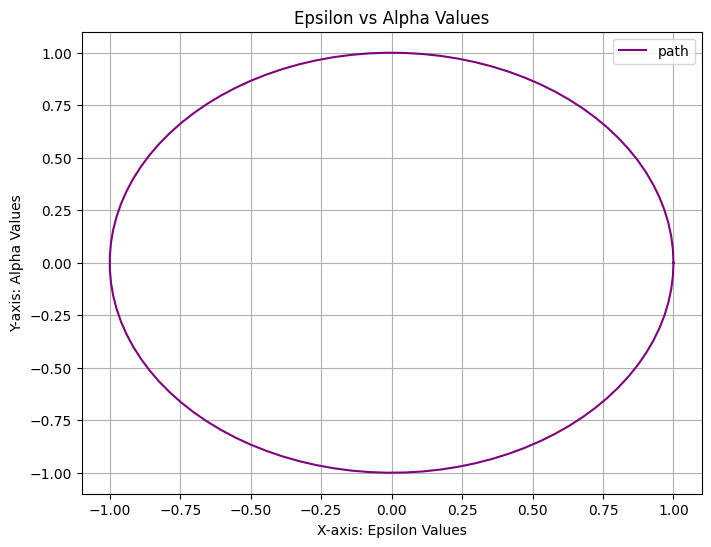

In [11]:
# Generate some sample data
  # first, figure out how to determine stability and make two lines
alpha = np.cos(np.linspace(0, 2 * np.pi, 100))
epsilon = np.sin(np.linspace(0, 2 * np.pi, 100))

x = alpha
y = epsilon

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(x, y, label='path', color='purple') # this will require some tweaking
# Add labels and title
plt.xlabel('X-axis: Epsilon Values')
plt.ylabel('Y-axis: Alpha Values')
plt.title('Epsilon vs Alpha Values')
plt.grid(True)
plt.legend()

# Show the plot
plt.show()